In [14]:
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, TimeDistributed, RepeatVector

In [15]:
import matplotlib.pyplot as plt

In [16]:
dataset = pd.read_csv('/home/lab606a/ML/datasets/dataset_20200225.csv', header=None)
dataset = dataset.fillna(0)
dataset = np.array(dataset)
dataset.shape

(3541, 145)

In [17]:
dataset = dataset[:928,1:]
dataset.shape

(928, 144)

In [18]:
#dataset = sequence.pad_sequences(dataset, maxlen=144, padding='post')
#dataset.shape

In [19]:
n_step = 9
#depth = (dataset.shape[1]+1-((2*3*n_step)/3))*dataset.shape[0]
depth = (48+1-n_step-n_step)*dataset.shape[0] # (all_balls + 1 - input_balls - output_balls)*n_rows
depth

28768

In [20]:
X = np.zeros([int(depth), n_step, 3])
Y = np.zeros([int(depth), n_step, 3])
X.shape

(28768, 9, 3)

In [21]:
'''
c = 0
d = 0

for i in range(int(depth)):
    for j in range(n_step):
        if d < dataset.shape[0]:
            X[i,j,:] = dataset[d, c:c+3]
            Y[i,j,:] = dataset[d, c+15:c+18]
            #print(i,"\n")
            #print(X[i,j,:])
            
            if ((c+18) != (dataset.shape[1])):
                c += 3
            else:
                c = 0
                d += 1
    if (c-3) > 0:
        c = c - 12
    else:
        c = c
'''

'\nc = 0\nd = 0\n\nfor i in range(int(depth)):\n    for j in range(n_step):\n        if d < dataset.shape[0]:\n            X[i,j,:] = dataset[d, c:c+3]\n            Y[i,j,:] = dataset[d, c+15:c+18]\n            #print(i,"\n")\n            #print(X[i,j,:])\n            \n            if ((c+18) != (dataset.shape[1])):\n                c += 3\n            else:\n                c = 0\n                d += 1\n    if (c-3) > 0:\n        c = c - 12\n    else:\n        c = c\n'

In [22]:
c = 0
d = 0

for i in range(int(depth)):
    for j in range(n_step):
        if d < dataset.shape[0]:
            X[i,j,:] = dataset[d, c:c+3]
            Y[i,j,:] = dataset[d, (c+3*n_step):(c+3*n_step+3)]
            #print(i,"\n")
            #print(X[i,j,:])
            
            if ((c+3*n_step+3) != (dataset.shape[1])):
                c += 3
            else:
                c = 0
                d += 1
    if (c-3) > 0:
        c = (c - 3*n_step + 3)
    else:
        c = c

In [23]:
X

array([[[109.664 , 294.622 ,  45.0965],
        [110.192 , 282.404 ,  47.4984],
        [111.107 , 269.696 ,  49.2127],
        ...,
        [112.043 , 225.891 ,  51.8066],
        [112.49  , 214.447 ,  51.3245],
        [112.189 , 202.743 ,  51.0245]],

       [[110.192 , 282.404 ,  47.4984],
        [111.107 , 269.696 ,  49.2127],
        [111.482 , 260.113 ,  50.2191],
        ...,
        [112.49  , 214.447 ,  51.3245],
        [112.189 , 202.743 ,  51.0245],
        [112.261 , 192.615 ,  49.1206]],

       [[111.107 , 269.696 ,  49.2127],
        [111.482 , 260.113 ,  50.2191],
        [111.643 , 248.745 ,  51.296 ],
        ...,
        [112.189 , 202.743 ,  51.0245],
        [112.261 , 192.615 ,  49.1206],
        [112.268 , 184.497 ,  48.014 ]],

       ...,

       [[ 96.264 , -15.5748,  20.9908],
        [ 95.0309, -22.0472,  23.5107],
        [ 93.3087, -31.9456,  28.1212],
        ...,
        [  0.    ,   0.    ,   0.    ],
        [  0.    ,   0.    ,   0.    ],
        [

In [24]:
Y

array([[[112.261 , 192.615 ,  49.1206],
        [112.268 , 184.497 ,  48.014 ],
        [111.576 , 172.081 ,  47.102 ],
        ...,
        [110.002 , 135.266 ,  35.5504],
        [108.93  , 123.644 ,  33.6674],
        [108.445 , 116.048 ,  28.0565]],

       [[112.268 , 184.497 ,  48.014 ],
        [111.576 , 172.081 ,  47.102 ],
        [111.44  , 162.644 ,  44.0185],
        ...,
        [108.93  , 123.644 ,  33.6674],
        [108.445 , 116.048 ,  28.0565],
        [106.982 , 105.372 ,  25.6818]],

       [[111.576 , 172.081 ,  47.102 ],
        [111.44  , 162.644 ,  44.0185],
        [110.644 , 151.474 ,  42.5254],
        ...,
        [108.445 , 116.048 ,  28.0565],
        [106.982 , 105.372 ,  25.6818],
        [106.551 ,  96.736 ,  19.4987]],

       ...,

       [[  0.    ,   0.    ,   0.    ],
        [  0.    ,   0.    ,   0.    ],
        [  0.    ,   0.    ,   0.    ],
        ...,
        [  0.    ,   0.    ,   0.    ],
        [  0.    ,   0.    ,   0.    ],
        [

In [25]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, TimeDistributed, RepeatVector

In [88]:

model = Sequential()
model.add(LSTM(1024, activation='linear', input_shape=(X.shape[1], X.shape[2])))
model.add(RepeatVector(X.shape[1]))
model.add(LSTM(1024, activation='linear', return_sequences=True))
model.add(TimeDistributed(Dense(3)))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 1024)              4210688   
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 9, 1024)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 9, 1024)           8392704   
_________________________________________________________________
time_distributed_7 (TimeDist (None, 9, 3)              3075      
Total params: 12,606,467
Trainable params: 12,606,467
Non-trainable params: 0
_________________________________________________________________


In [27]:
'''
model = Sequential()
model.add(LSTM(1024, activation='linear', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(128, activation='linear'))
model.add(RepeatVector(X.shape[1]))
model.add(LSTM(128, activation='linear', return_sequences=True))
model.add(LSTM(1024, activation='linear', return_sequences=True))
model.add(TimeDistributed(Dense(3)))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()
'''

"\nmodel = Sequential()\nmodel.add(LSTM(1024, activation='linear', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))\nmodel.add(LSTM(128, activation='linear'))\nmodel.add(RepeatVector(X.shape[1]))\nmodel.add(LSTM(128, activation='linear', return_sequences=True))\nmodel.add(LSTM(1024, activation='linear', return_sequences=True))\nmodel.add(TimeDistributed(Dense(3)))\n\nmodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])\nmodel.summary()\n"

In [91]:
history = model.fit(X, Y, batch_size=5000, epochs=500, shuffle=True)

Epoch 1/500
28768/28768 [==============================] - 4s 129us/step - loss: 5.8035 - acc: 0.8536
Epoch 2/500
10000/28768 [=========>....................] - ETA: 2s - loss: 9.8713 - acc: 0.8995

KeyboardInterrupt: 

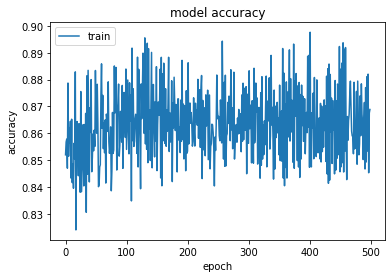

In [92]:
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

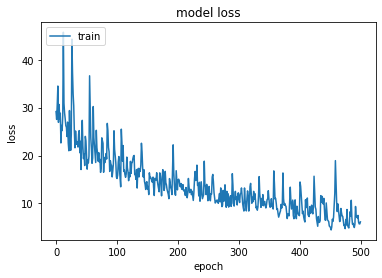

In [93]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [94]:
x_test = X[0,:,:]
x_test = x_test.reshape(1,n_step,3)
x_test

array([[[109.664 , 294.622 ,  45.0965],
        [110.192 , 282.404 ,  47.4984],
        [111.107 , 269.696 ,  49.2127],
        [111.482 , 260.113 ,  50.2191],
        [111.643 , 248.745 ,  51.296 ],
        [112.2   , 237.027 ,  51.326 ],
        [112.043 , 225.891 ,  51.8066],
        [112.49  , 214.447 ,  51.3245],
        [112.189 , 202.743 ,  51.0245]]])

In [95]:
yhat = Y[0,:,:]
yhat = yhat.reshape(1,n_step,3)
yhat

array([[[112.261 , 192.615 ,  49.1206],
        [112.268 , 184.497 ,  48.014 ],
        [111.576 , 172.081 ,  47.102 ],
        [111.44  , 162.644 ,  44.0185],
        [110.644 , 151.474 ,  42.5254],
        [110.499 , 142.259 ,  38.5546],
        [110.002 , 135.266 ,  35.5504],
        [108.93  , 123.644 ,  33.6674],
        [108.445 , 116.048 ,  28.0565]]])

In [96]:
pred = model.predict(x_test)
pred

array([[[110.21484 , 189.80212 ,  48.79879 ],
        [110.03155 , 178.96797 ,  48.55809 ],
        [109.49717 , 168.32991 ,  46.461353],
        [108.8886  , 158.0926  ,  44.379955],
        [108.21108 , 148.0358  ,  42.40099 ],
        [107.293236, 137.741   ,  39.648624],
        [106.62558 , 127.464226,  37.27041 ],
        [105.52862 , 117.955124,  33.49942 ],
        [104.83028 , 108.138824,  30.304995]]], dtype=float32)

In [97]:
error = yhat-pred
error

array([[[ 2.04615625,  2.81287598,  0.32181002],
        [ 2.23645245,  5.5290282 , -0.54409021],
        [ 2.07883051,  3.75108972,  0.6406467 ],
        [ 2.55139679,  4.55139441, -0.36145529],
        [ 2.43291754,  3.43820288,  0.12441047],
        [ 3.20576422,  4.51800269, -1.09402442],
        [ 3.37642017,  7.80177423, -1.72000863],
        [ 3.40138214,  5.6888761 ,  0.16797983],
        [ 3.61472351,  7.90917554, -2.24849458]]])

In [98]:
X_test = pd.read_csv('/home/lab606a/ML/datasets/up_speed6_test.csv', header=None)
X_test = X_test.fillna(0)
X_test = np.array(X_test)
X_test.shape

(84, 102)

In [99]:
X_test = sequence.pad_sequences(X_test, maxlen=144, padding='post', dtype='float32')
X_test.shape

(84, 144)

In [100]:
depth_test = (48+1-n_step-n_step)*X_test.shape[0] # (all_balls + 1 - input_balls - output_balls)*n_rows
depth_test

2604

In [101]:
X_test[0,:]

array([ 99.9476 , 311.357  ,  42.0334 , 100.287  , 299.382  ,  45.4737 ,
       100.221  , 285.588  ,  48.0977 , 100.406  , 272.574  ,  50.571  ,
       100.517  , 259.183  ,  52.5968 , 100.327  , 245.543  ,  54.2019 ,
       100.845  , 232.79   ,  55.0232 , 100.538  , 218.838  ,  55.8921 ,
       100.48   , 208.613  ,  55.3978 , 100.879  , 196.334  ,  54.116  ,
       100.555  , 183.823  ,  54.0836 , 100.908  , 172.22   ,  51.4835 ,
       100.643  , 158.98   ,  50.4459 , 100.908  , 149.416  ,  45.7059 ,
       100.505  , 137.569  ,  43.6558 , 100.541  , 128.856  ,  40.5762 ,
       100.987  , 117.044  ,  35.9557 , 100.867  , 105.872  ,  32.9989 ,
       100.691  ,  96.672  ,  25.7368 , 100.637  ,  84.1649 ,  23.4778 ,
       100.826  ,  74.3845 ,  14.9716 , 100.159  ,  66.3544 ,   9.81006,
       100.357  ,  57.1096 ,   5.12739, 100.36   ,  43.9507 ,   3.94486,
       100.284  ,  34.2945 ,   9.02872, 100.646  ,  23.944  ,  13.9128 ,
       100.393  ,  12.1827 ,  19.0803 , 100.865  , 

In [102]:
x_test = X_test[0,:]
x_test = x_test[:n_step*3,]
x_test = x_test.reshape(1,n_step,3)
x_test

array([[[ 99.9476, 311.357 ,  42.0334],
        [100.287 , 299.382 ,  45.4737],
        [100.221 , 285.588 ,  48.0977],
        [100.406 , 272.574 ,  50.571 ],
        [100.517 , 259.183 ,  52.5968],
        [100.327 , 245.543 ,  54.2019],
        [100.845 , 232.79  ,  55.0232],
        [100.538 , 218.838 ,  55.8921],
        [100.48  , 208.613 ,  55.3978]]], dtype=float32)

In [103]:
yhat = X_test[0,:]
yhat = yhat[n_step*3:n_step*3+n_step*3]
yhat = yhat.reshape(1,n_step,3)
yhat

array([[[100.879 , 196.334 ,  54.116 ],
        [100.555 , 183.823 ,  54.0836],
        [100.908 , 172.22  ,  51.4835],
        [100.643 , 158.98  ,  50.4459],
        [100.908 , 149.416 ,  45.7059],
        [100.505 , 137.569 ,  43.6558],
        [100.541 , 128.856 ,  40.5762],
        [100.987 , 117.044 ,  35.9557],
        [100.867 , 105.872 ,  32.9989]]], dtype=float32)

In [104]:
pred = model.predict(x_test)
pred

array([[[ 98.70392 , 193.86879 ,  52.656082],
        [ 96.61339 , 181.96367 ,  53.02805 ],
        [ 95.914986, 170.45943 ,  51.605907],
        [ 95.31249 , 158.2657  ,  50.79004 ],
        [ 94.57574 , 147.4921  ,  48.906086],
        [ 92.91337 , 135.86009 ,  46.546043],
        [ 91.88498 , 124.7881  ,  44.867386],
        [ 89.48888 , 113.533714,  41.751392],
        [ 88.595535, 102.95659 ,  38.747765]]], dtype=float32)

In [105]:
error = yhat-pred
error

array([[[ 2.1750793 ,  2.46521   ,  1.459919  ],
        [ 3.9416122 ,  1.8593292 ,  1.0555496 ],
        [ 4.9930115 ,  1.7605743 , -0.12240601],
        [ 5.3305054 ,  0.71429443, -0.3441391 ],
        [ 6.33226   ,  1.9239044 , -3.2001877 ],
        [ 7.591629  ,  1.7089081 , -2.8902435 ],
        [ 8.656021  ,  4.0679016 , -4.2911873 ],
        [11.498123  ,  3.5102844 , -5.7956924 ],
        [12.2714615 ,  2.915413  , -5.748863  ]]], dtype=float32)

In [106]:
x_test = np.zeros([int(depth_test), n_step, 3])
yhat = np.zeros([int(depth_test), n_step, 3])
error = np.zeros([int(depth_test), n_step, 3])
pred = np.zeros([int(depth_test), n_step, 3])
x_test.shape

(2604, 9, 3)

In [107]:
'''
c = 0
d = 0

for i in range(int(depth)):
    for j in range(n_step):
        if d < dataset.shape[0]:
            X[i,j,:] = dataset[d, c:c+3]
            Y[i,j,:] = dataset[d, (c+3*n_step):(c+3*n_step+3)]
            #print(i,"\n")
            #print(X[i,j,:])
            
            if ((c+3*n_step+3) != (dataset.shape[1])):
                c += 3
            else:
                c = 0
                d += 1
                
    
                
    if (c-3) > 0:
        c = (c - 3*n_step + 3)
    else:
        c = c
'''

'\nc = 0\nd = 0\n\nfor i in range(int(depth)):\n    for j in range(n_step):\n        if d < dataset.shape[0]:\n            X[i,j,:] = dataset[d, c:c+3]\n            Y[i,j,:] = dataset[d, (c+3*n_step):(c+3*n_step+3)]\n            #print(i,"\n")\n            #print(X[i,j,:])\n            \n            if ((c+3*n_step+3) != (dataset.shape[1])):\n                c += 3\n            else:\n                c = 0\n                d += 1\n                \n    \n                \n    if (c-3) > 0:\n        c = (c - 3*n_step + 3)\n    else:\n        c = c\n'

In [108]:
c = 0
d = 0

for i in range(int(depth_test)):
    for j in range(n_step):
        if d < X_test.shape[0]:
            x_test[i,j,:] = X_test[d, c:c+3]
            yhat[i,j,:] = X_test[d, (c+3*n_step):(c+3*n_step+3)]
            #print(i,"\n")
            #print(X[i,j,:])
            
            if ((c+3*n_step+3) != (X_test.shape[1])):
                c += 3
            else:
                c = 0
                d += 1
    tmp = x_test[i,:,:]
    tmp = tmp.reshape(1,n_step,3)
    pred[i,:,:] = model.predict(tmp)
    error = yhat-pred
    #print(error[i,:,:])
    
                
    if (c-3) > 0:
        c = c - (c - 3*n_step + 3)
    else:
        c = c


In [109]:
np.set_printoptions(suppress=True)

In [110]:
pred

array([[[ 98.70391846, 193.86878967,  52.65608215],
        [ 96.61338806, 181.96366882,  53.02804947],
        [ 95.91498566, 170.45942688,  51.60590744],
        ...,
        [ 91.88497925, 124.7881012 ,  44.86738586],
        [ 89.48887634, 113.53371429,  41.75139236],
        [ 88.59553528, 102.95658875,  38.74776459]],

       [[ 98.25508118, 105.43065643,  33.30490494],
        [ 97.2888031 ,  93.67990112,  29.09587097],
        [ 96.28728485,  82.28538513,  24.55873489],
        ...,
        [ 92.92044067,  42.35725021,   3.89962363],
        [ 90.93475342,  33.78956223,   3.61381292],
        [ 89.01351166,  26.0685463 ,   8.57098579]],

       [[ 98.25508118, 105.43065643,  33.30490494],
        [ 97.2888031 ,  93.67990112,  29.09587097],
        [ 96.28728485,  82.28538513,  24.55873489],
        ...,
        [ 92.92044067,  42.35725021,   3.89962363],
        [ 90.93475342,  33.78956223,   3.61381292],
        [ 89.01351166,  26.0685463 ,   8.57098579]],

       ...,

      

In [111]:
pred.shape

(2604, 9, 3)

In [112]:
num = 48+1-n_step-n_step
num

31

In [113]:
tmp = pred[num:2*num,:,:]
tmp.shape

(31, 9, 3)

In [114]:
tmp = tmp.reshape(num*n_step,3)
tmp

array([[ 98.25508118, 105.43065643,  33.30490494],
       [ 97.2888031 ,  93.67990112,  29.09587097],
       [ 96.28728485,  82.28538513,  24.55873489],
       [ 95.5846405 ,  71.94013214,  19.9980793 ],
       [ 94.29410553,  61.30474854,  15.1743412 ],
       [ 93.83106232,  51.33660889,   9.93526649],
       [ 92.92044067,  42.35725021,   3.89962363],
       [ 90.93475342,  33.78956223,   3.61381292],
       [ 89.01351166,  26.0685463 ,   8.57098579],
       [ 98.25508118, 105.43065643,  33.30490494],
       [ 97.2888031 ,  93.67990112,  29.09587097],
       [ 96.28728485,  82.28538513,  24.55873489],
       [ 95.5846405 ,  71.94013214,  19.9980793 ],
       [ 94.29410553,  61.30474854,  15.1743412 ],
       [ 93.83106232,  51.33660889,   9.93526649],
       [ 92.92044067,  42.35725021,   3.89962363],
       [ 90.93475342,  33.78956223,   3.61381292],
       [ 89.01351166,  26.0685463 ,   8.57098579],
       [ 98.25508118, 105.43065643,  33.30490494],
       [ 97.2888031 ,  93.67990

In [115]:
tmp2 = yhat[num:2*num,:,:]
tmp2.shape

(31, 9, 3)

In [116]:
tmp2 = tmp2.reshape(num*n_step,3)
tmp2

array([[100.86699677, 105.87200165,  32.99890137],
       [100.69100189,  96.67199707,  25.73679924],
       [100.63700104,  84.16490173,  23.47780037],
       [100.8259964 ,  74.3844986 ,  14.97159958],
       [100.15899658,  66.35440063,   9.81005955],
       [100.35700226,  57.10960007,   5.12738991],
       [100.36000061,  43.95069885,   3.94485998],
       [100.28399658,  34.29449844,   9.0287199 ],
       [100.64600372,  23.94400024,  13.91279984],
       [100.86699677, 105.87200165,  32.99890137],
       [100.69100189,  96.67199707,  25.73679924],
       [100.63700104,  84.16490173,  23.47780037],
       [100.8259964 ,  74.3844986 ,  14.97159958],
       [100.15899658,  66.35440063,   9.81005955],
       [100.35700226,  57.10960007,   5.12738991],
       [100.36000061,  43.95069885,   3.94485998],
       [100.28399658,  34.29449844,   9.0287199 ],
       [100.64600372,  23.94400024,  13.91279984],
       [100.86699677, 105.87200165,  32.99890137],
       [100.69100189,  96.67199

In [117]:
err = tmp2-tmp
err

array([[ 2.61191559,  0.44134521, -0.30600357],
       [ 3.40219879,  2.99209595, -3.35907173],
       [ 4.34971619,  1.8795166 , -1.08093452],
       [ 5.2413559 ,  2.44436646, -5.02647972],
       [ 5.86489105,  5.0496521 , -5.36428165],
       [ 6.52593994,  5.77299118, -4.80787659],
       [ 7.43955994,  1.59344864,  0.04523635],
       [ 9.34924316,  0.50493622,  5.41490698],
       [11.63249207, -2.12454605,  5.34181404],
       [ 2.61191559,  0.44134521, -0.30600357],
       [ 3.40219879,  2.99209595, -3.35907173],
       [ 4.34971619,  1.8795166 , -1.08093452],
       [ 5.2413559 ,  2.44436646, -5.02647972],
       [ 5.86489105,  5.0496521 , -5.36428165],
       [ 6.52593994,  5.77299118, -4.80787659],
       [ 7.43955994,  1.59344864,  0.04523635],
       [ 9.34924316,  0.50493622,  5.41490698],
       [11.63249207, -2.12454605,  5.34181404],
       [ 2.61191559,  0.44134521, -0.30600357],
       [ 3.40219879,  2.99209595, -3.35907173],
       [ 4.34971619,  1.8795166 , -1.080

In [118]:
df = pd.DataFrame(tmp)
#df.to_csv('/home/lab606a/ML/datasets/20200303/pred2.csv',index=0 ,header=0)

In [119]:
df2 = pd.DataFrame(tmp2)
#df2.to_csv('/home/lab606a/ML/datasets/20200303/yhat2.csv',index=0 ,header=0)

In [120]:
#model.save('./saved model/prediction_up_9balls_20200303')